In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_league = pd.read_html('https://fbref.com/pt/comps/9/Premier-League-Estatisticas')[0]
df_shooting = pd.read_html('https://fbref.com/pt/comps/9/shooting/Premier-League-Estatisticas')[0]

In [3]:
league = pd.DataFrame(df_league)
shooting = pd.DataFrame(df_shooting)

shooting.columns = shooting.columns.droplevel(0)

shooting.head()

,Equipe,# J,90s,Gols,TC,CaG,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PB,PT,xG,npxG,npxG/Sh,G-xG,np:G-xG
0,Arsenal,24,29.0,51,400,135,338,1379,466,12,36,151,6,2,2,44.5,43.0,11,6.5,6.0
1,Aston Villa,28,29.0,40,361,113,313,1245,390,11,34,160,10,2,3,41.2,38.8,11,-1.2,-0.8
2,Bournemouth,28,29.0,47,457,159,348,1576,548,9,26,166,8,6,7,52.9,47.4,11,-5.9,-6.4
3,Brentford,27,29.0,50,334,134,401,1152,462,14,34,154,9,4,4,44.7,41.6,13,5.3,4.4
4,Brighton,30,29.0,46,399,135,338,1376,466,11,32,172,20,3,3,43.6,41.3,11,2.4,1.7


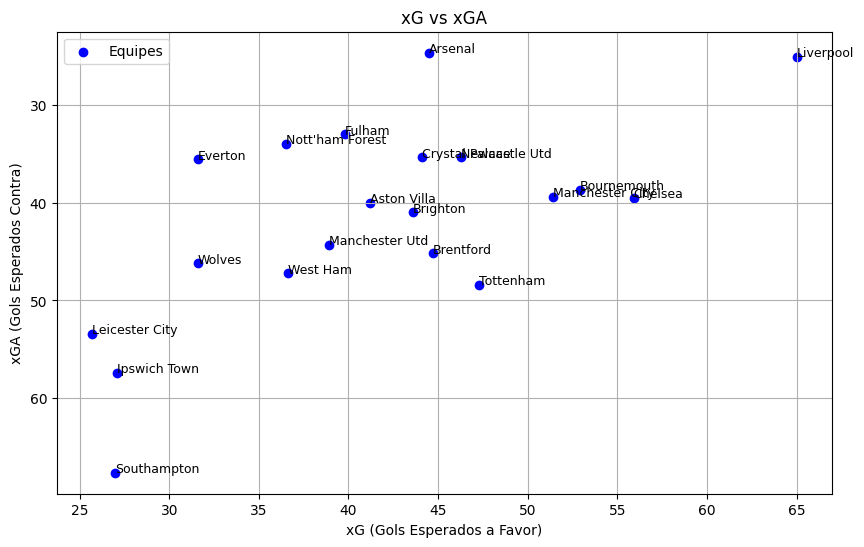

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(league["xG"], league["xGA"], color="blue", label="Equipes")
for i, team in enumerate(league["Equipe"]):
    plt.text(league["xG"][i], league["xGA"][i], team, fontsize=9)

plt.title("xG vs xGA")
plt.xlabel("xG (Gols Esperados a Favor)")
plt.ylabel("xGA (Gols Esperados Contra)")
plt.gca().invert_yaxis() 
plt.grid(True)
plt.legend()
plt.show()

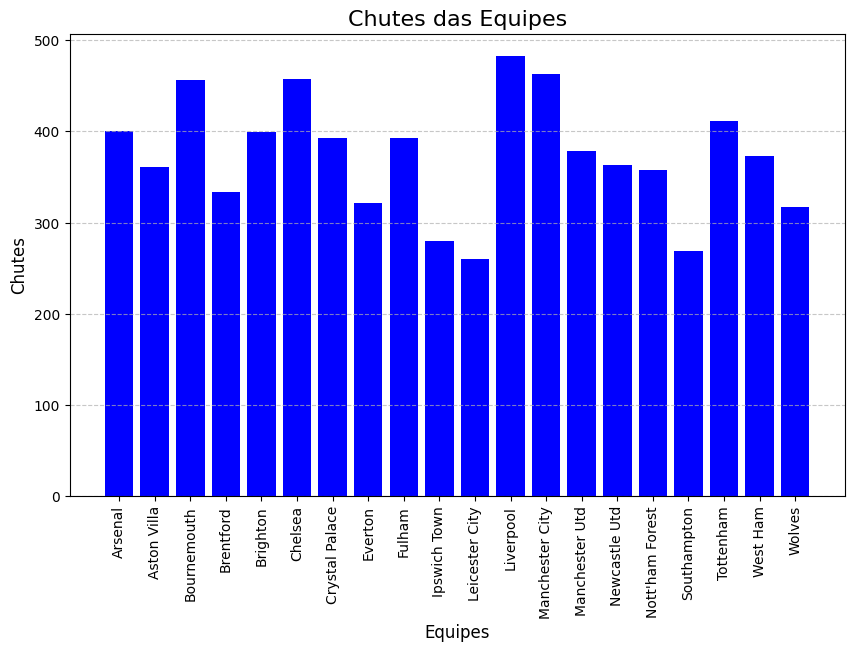

In [5]:
plt.figure(figsize=(10, 6))
plt.bar(shooting['Equipe'], shooting['TC'], color="blue")

plt.title("Chutes das Equipes", fontsize=16)
plt.xlabel("Equipes", fontsize=12)
plt.ylabel("Chutes", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

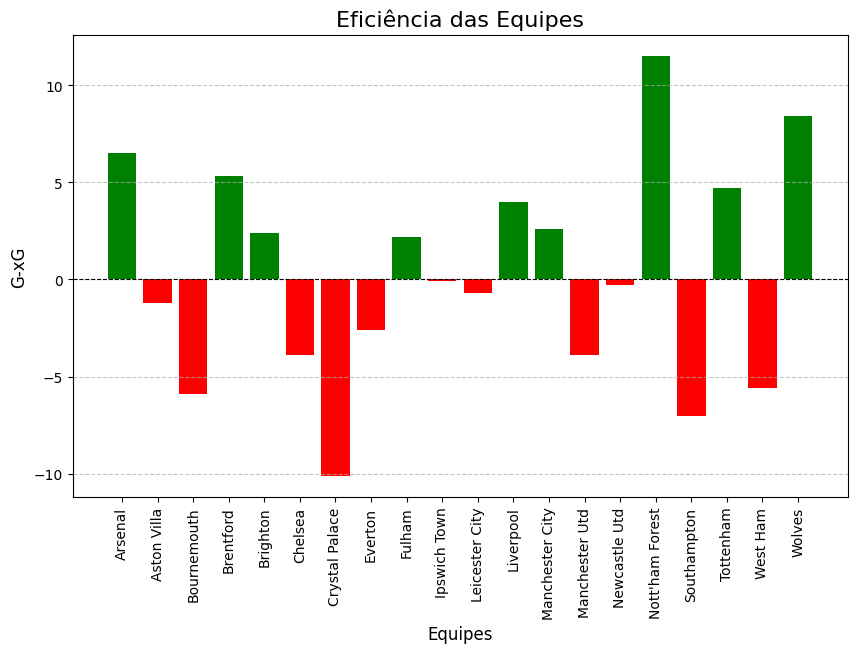

In [6]:
colors = ["green" if value >= 0 else "red" for value in shooting["G-xG"]]

plt.figure(figsize=(10, 6))
plt.bar(shooting['Equipe'], shooting['G-xG'], color=colors)

plt.title("Eficiência das Equipes", fontsize=16)
plt.xlabel("Equipes", fontsize=12)
plt.ylabel("G-xG", fontsize=12)
plt.axhline(0, color="black", linewidth=0.8, linestyle="--")  
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

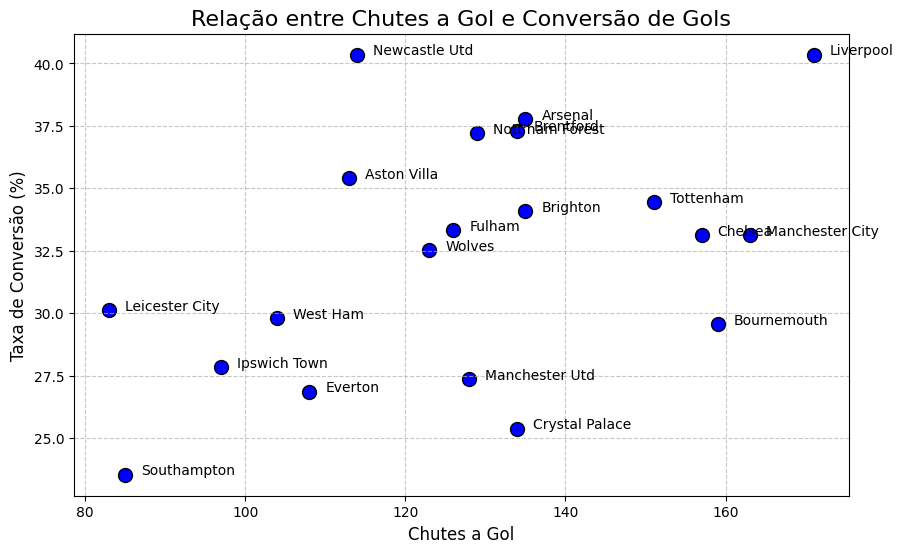

In [7]:
shooting["Conversion Rate (%)"] = (shooting["Gols"] / shooting["CaG"]) * 100

plt.figure(figsize=(10,6))
plt.scatter(shooting['CaG'], shooting['Conversion Rate (%)'], color='blue',  s=100, edgecolor="black")

for i, team in enumerate(shooting["Equipe"]):
    plt.text(shooting["CaG"][i] + 2, shooting["Conversion Rate (%)"][i], team, fontsize=10)

plt.title("Relação entre Chutes a Gol e Conversão de Gols", fontsize=16)
plt.xlabel("Chutes a Gol", fontsize=12)
plt.ylabel("Taxa de Conversão (%)", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.7)

plt.show()